<a href="https://colab.research.google.com/github/JosaiahS/Django-To-Do-List-Learn/blob/main/5_ImageWarping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Every point on this homework must be solved with python code. You will show your code, your results, and make a clear statement of what is you answer. Answer **all** the questions.
1. You will be applying a transformation on a set of points of the following image (18%).
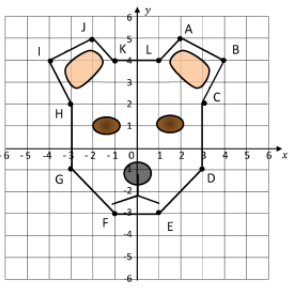
<br>
a) [2%] Find the matrix that represents a rotation of 20 degrees in homogeneous coordinates.<br>
b) [2%] Find the matrix  that represents a translation of 2 in X direction, 1 in y direction degrees in homogeneous coordinates.<br>
c) [2%] Plot the points that form the figure in the cartesian plane.<br>
d) [2%] Perform a rotation of 20 degrees on the points and plot them. <br>
e) [2%] Perform a translation  in x of 2 and a translation in y of 1 over the points previously rotated. Plot the new obtained points.<br>
f) [2%] Find a transform that represents the operation of rotation of 20 degrees followed by a translation. Compare with the points on e) and verify with a plot the match.<br>
g) [2%] Defines a matrix that represents a translation of 2 in x and a translation of 1 in y, followed by a rotation of 20 degrees. Do the transformation over the initial set of points and compare them.<br>
h) [2%] Are the matrices obtained in g) and f) the same? Why? Justify your answer.<br>
i) [2%] Compute the inverse matrix of the transformation obtained in g). Apply such transformation over the set of points obtained in g). Do the new points match the original points? show plots to verify it.<br>



Rotation Matrix (20 degrees):
 [[ 0.93969262 -0.34202014  0.        ]
 [ 0.34202014  0.93969262  0.        ]
 [ 0.          0.          1.        ]]
Translation Matrix (tx=2, ty=1):
 [[1 0 2]
 [0 1 1]
 [0 0 1]]


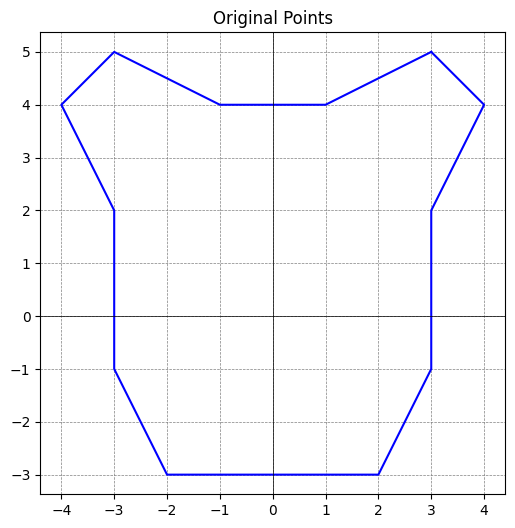

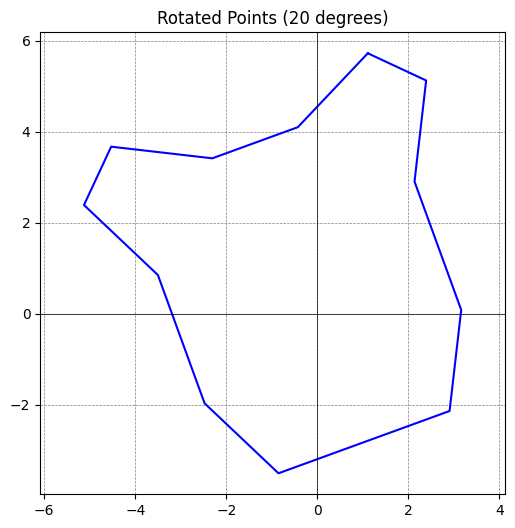

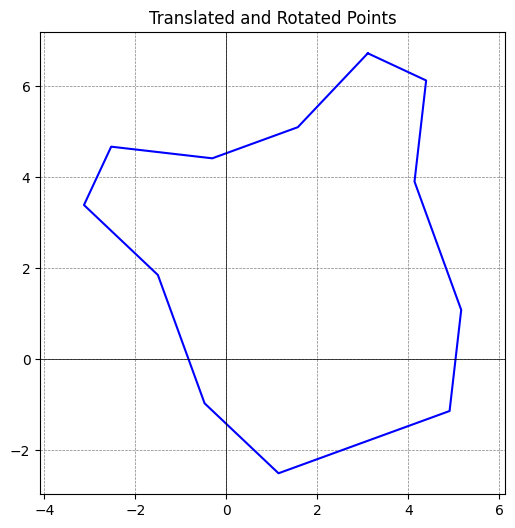

Points match: True


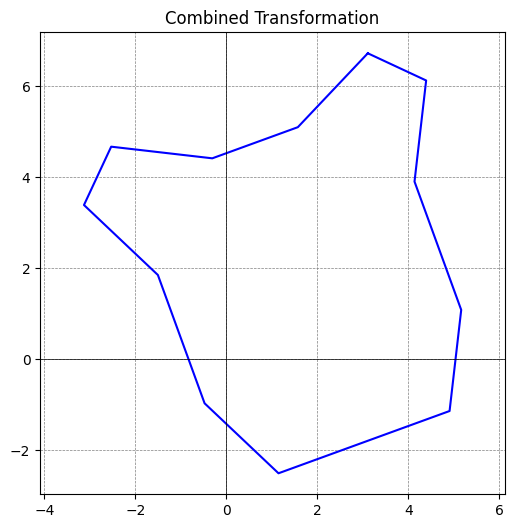

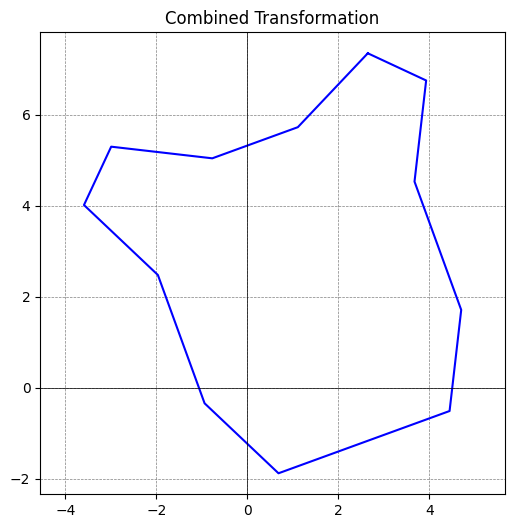

Matrices are the same: False
Restored points: True


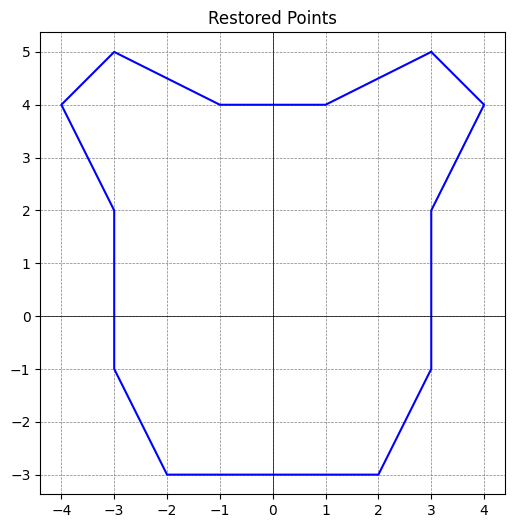

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Rotation and translation values
tetadeg = 20
teta = np.pi * tetadeg / 180
tx, ty = 2, 1

# Homogeneous coordinates
points = np.array([
    [3, 5, 1], [4, 4, 1], [3, 2, 1], [3, -1, 1], [2, -3, 1],
    [-2, -3, 1], [-3, -1, 1], [-3, 2, 1], [-4, 4, 1], [-3, 5, 1],
    [-1, 4, 1], [1, 4, 1]
]).T

# Ensuring that the shape is closed
points_closed = np.hstack([points, points[:, :1]])

# Used to ensure that the points are connected with each other.
def plot_connected_points(points, title, color='blue'):
    plt.figure(figsize=(6, 6))
    plt.plot(points[0, :], points[1, :], color=color)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Matrix for rotation
R = np.array([
    [np.cos(teta), -np.sin(teta), 0],
    [np.sin(teta), np.cos(teta), 0],
    [0, 0, 1]
])
print("Rotation Matrix (20 degrees):\n", R)

# Matrix for translation
T = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])
print("Translation Matrix (tx=2, ty=1):\n", T)

# Plotting the original points
plot_connected_points(points_closed, "Original Points")

# Plotting the rotational points
rotated_points = np.matmul(R, points_closed)
plot_connected_points(rotated_points, "Rotated Points (20 degrees)")

# Plotting the translation points.
translated_rotated_points = np.matmul(T, rotated_points)
plot_connected_points(translated_rotated_points, "Translated and Rotated Points")

# Combination of both rotation and translation
M = np.matmul(T, R)
combined_transformed_points = np.matmul(M, points_closed)
print("Points match:", np.allclose(translated_rotated_points, combined_transformed_points))
plot_connected_points(combined_transformed_points, "Combined Transformation")

# Reversing the order of rotation and translation
M_prime = np.matmul(R, T)
transformed_points_prime = np.matmul(M_prime, points_closed)
plot_connected_points(transformed_points_prime, "Combined Transformation")
print("Matrices are the same:", np.allclose(M, M_prime))

# Restoring the original points
M_prime_inv = np.linalg.inv(M_prime)
restored_points = np.matmul(M_prime_inv, transformed_points_prime)
print("Restored points:", np.allclose(restored_points, points_closed))
plot_connected_points(restored_points, "Restored Points")

The code above showcases different type of 2D transformations using homogeneous coordinates. Showing translation, rotations, and inversions.

2. In this point you will be doing forward warping of an image and will be implementing a nearest neighbor interpolation on the following image. (Available [here](http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/) )<br>
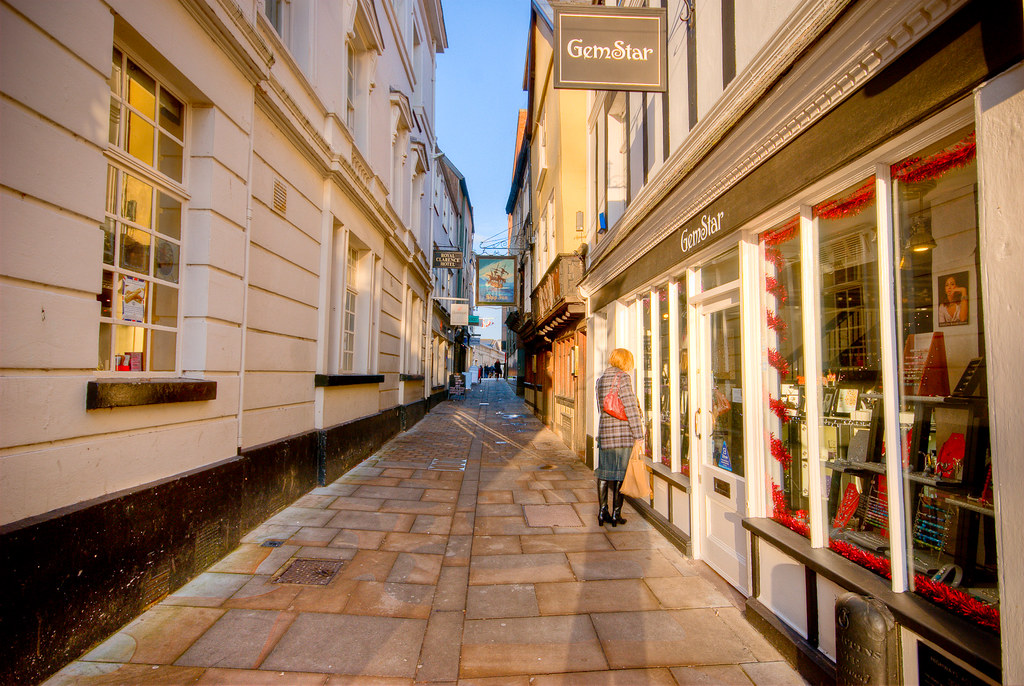
a) [10%] Implement forward warping of the grid points for the homography matrix: <br>
H=[[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],<br>
  [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],<br>
 [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]<br>
 <br>
 b) [2%]Visualize the obtained warped image in the range from 0 to 1000 in x and y.<br>
 c) [2%]comment about the appereance of the image. Does the image have gaps?<br>
 d) [5%] How the warping looks in regions where outside the [0-1000 pixels in x,y]<br>
 e) [10%] Implement a forward  nearest neighbor interpolation in the warped image<br>
 f) [3%]Visualize the interpolated image. <br>
 g) [2%] comment about the appereance of the interpolated image versus the initially warped image.



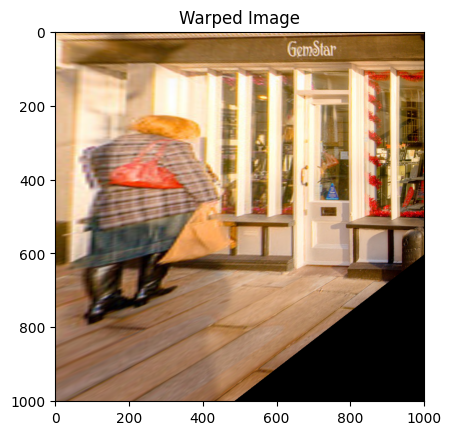

In [47]:
from skimage import io
from scipy.ndimage import map_coordinates

#Loading image
url = "http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/img2warp.jpg"
img = io.imread(url)

# 3x3 homography matrix
H = np.array([[-2.90978069e+00, 3.54859237e-02, 1.70029144e+03],
              [-6.48857919e-01, -8.36844934e-01, 6.24249500e+02],
              [-2.10617311e-03, 8.27414761e-06, 1.00000000e+00]])

# Inverse of the above homography matrix
H_inv = np.linalg.inv(H)

height, width = 1001, 1001

# A grid for the destination matrix
yv_dest, xv_dest = np.meshgrid(np.arange(height), np.arange(width), indexing='ij')

# Converting the destination matrix above to homogeneous coordinates
dest_grid_homo = np.stack([xv_dest.ravel(), yv_dest.ravel(), np.ones(xv_dest.size)])
#Turning the grid into a source grid.
source_grid_homo = H_inv @ dest_grid_homo
#Converting to cartesian coordinates
source_grid = source_grid_homo[:2] / source_grid_homo[2]
# Reshaping the grid to match dimensions with the destination matrix
y_source = source_grid[1].reshape((height, width))
x_source = source_grid[0].reshape((height, width))

# Warping each channel
channels = []
for c in range(3):
    channel = map_coordinates(img[:, :, c],
                             [y_source.ravel(), x_source.ravel()],
                             order=1,
                             mode='constant',
                             cval=0)
    channels.append(channel.reshape((height, width)))
# Combining the warped channels.
warped_corrected = np.stack(channels, axis=-1).astype(np.uint8)

plt.imshow(warped_corrected)
plt.title("Warped Image")
plt.show()

We are applying homography transformation to warp the image above. We use opencv to process the image and warp it with the homography matrix.


3. Write a function of the form (10%):



>> imwarped = warpImage(im,H,limit_coordinates)



where im is the input image to be warped, H is the homography, and limit_coordinates defines the limits (xmin,xmax,ymin,ymax) of the warped image.  


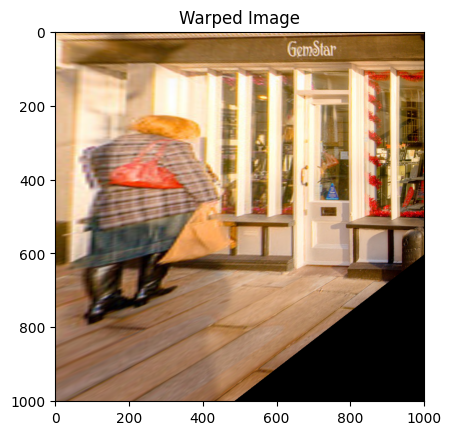

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy.ndimage import map_coordinates

url = "http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/img2warp.jpg"
img = io.imread(url)

# 3x3 homography matrix
H = np.array([[-2.90978069e+00, 3.54859237e-02, 1.70029144e+03],
              [-6.48857919e-01, -8.36844934e-01, 6.24249500e+02],
              [-2.10617311e-03, 8.27414761e-06, 1.00000000e+00]])

# Inverse of the homography matrix
H_inv = np.linalg.inv(H)
# Dimensions of the output image
height, width = 1001, 1001
# Creating a grid for the destination image
yv_dest, xv_dest = np.meshgrid(np.arange(height), np.arange(width), indexing='ij')
# Converting the destination grid to homogeneous coordinates
dest_grid_homo = np.stack([xv_dest.ravel(), yv_dest.ravel(), np.ones(xv_dest.size)])
# Applying the inverse homography to map destination to source
source_grid_homo = H_inv @ dest_grid_homo
# Converting from homogeneous to Cartesian coordinates
source_grid = source_grid_homo[:2] / source_grid_homo[2]
# Reshaping the source grid to match the destination dimensions
y_source = source_grid[1].reshape((height, width))
x_source = source_grid[0].reshape((height, width))

# Warping each channel
channels = []
for c in range(3):
    # Interpolating pixel values
    channel = map_coordinates(img[:, :, c],
                             [y_source.ravel(), x_source.ravel()],
                             order=1,
                             mode='constant',
                             cval=0)
    channels.append(channel.reshape((height, width)))

# Combining the warped channels
warped_corrected = np.stack(channels, axis=-1).astype(np.uint8)

plt.imshow(warped_corrected)
plt.title("Warped Image")
plt.show()

We apply homography transformation to warp the image above using an inverse 3x3 homography matrix. We use interpolation to warp the images pixel values.

<br>

4. **Recover Homographies (10%)**.  Before you can warp your images into alignment, you need to recover the parameters of the transformation between each pair of images.  
In our case, the transformation is a homography: $p’=Hp$,
where:
* $(p’,p)$ are pairs of corresponding points taken from the two images.  
* $H$ is a 3x3 matrix with 8 degrees of freedom (lower right corner is a scaling factor and can be set to 1;  $h_{2,2}  = 1$). <br>

Considering the matrix form below, <b>obtain an expression of the form $Ax=b$ if $h_{22} =1$ </b><br>

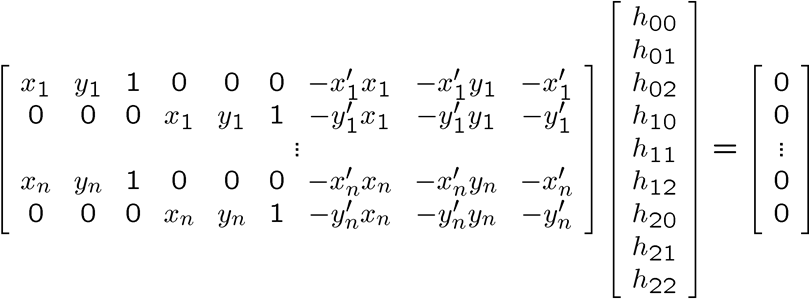
<br>
<b>Tip: if $h_{2,2}$ is 1, you can have 1 parameter less in the h vector and 1 column less in the matrix; b will not be zero anymore</b>
<br>
<br>
5. Write a python function using the expression obtained in the previous point with the following prototype (10%): <br>

>> H = computeH(im1_pts,im2_pts) <br>

> where im1_pts and im2_pts are n-by-2 matrices holding the (x,y) locations of n point correspondences from the two images and H is the recovered 3x3 homography matrix.  <br>
<br>






6. Test your functions. Select 4 points manually from the image in point 2. The cooresponding points will be your corner points in the new warped image (origin, top right, bottom right, bottom left). <br>
a) Compute a new homography matrix using function created in 5. (10%).<br>
b) Visualize the warped image using the function created in 3. (8%).<br>
<br>

**BONUS [50%] Stackable with other homeworks if your score overpass 100%**:
Write a function of the form:


>> imwarped = warpImage(im1,im2,H)



where im1 and im2 are the input images to be warped and H is the homography that wrap im1 to im2.  

Use the method described in class. you need forward and inverse warping (but remember that for inverse warping you will need to compute H in the right “direction”).

Try to write the whole function without any loops. One thing you need to pay attention to is the size of the resulting image (you can predict the bounding box by piping the four corners of the image through H, or use extra input parameters).  Also pay attention to how you mark pixels which don’t have any values.

Utilizes bilinear interpolation to approximate non integer pixel positions.



In [49]:
import numpy as np

def computeH(im1_pts, im2_pts):

    n = im1_pts.shape[0]
    # creating matrixes
    A = np.zeros((2 * n, 8))
    b = np.zeros((2 * n, 1))
    # iterate over each point correspondence.
    for i in range(n):
      #extract the coordinates
        x, y = im1_pts[i]
        xp, yp = im2_pts[i]
        # Fill with values calculated from the point correspondences.
        A[2*i] = [x, y, 1, 0, 0, 0, -xp*x, -xp*y]
        b[2*i] = xp

        A[2*i + 1] = [0, 0, 0, x, y, 1, -yp*x, -yp*y]
        b[2*i + 1] = yp

    h = np.linalg.lstsq(A, b, rcond=None)[0]
    # flatten h
    h = h.flatten()
    # reshape into 3x3 homography matrix
    H = np.array([
        [h[0], h[1], h[2]],
        [h[3], h[4], h[5]],
        [h[6], h[7], 1.0]
    ])

    return H

We create a homography matrix using linear equations. We then use least squares to find the necessary vector to be able to reshape into a 3x3 homography matrix.

In [50]:
im1_pts = np.array([[100, 150], [400, 150], [400, 350], [100, 350]])

width, height = 500, 500
im2_pts = np.array([[0, 0], [width, 0], [width, height], [0, height]])

H = computeH(im1_pts, im2_pts)
print("Homography Matrix:\n", H)

Homography Matrix:
 [[ 1.66666667e+00  1.86244574e-13 -1.66666667e+02]
 [-7.48290319e-14  2.50000000e+00 -3.75000000e+02]
 [ 1.06634536e-14 -1.82044050e-14  1.00000000e+00]]


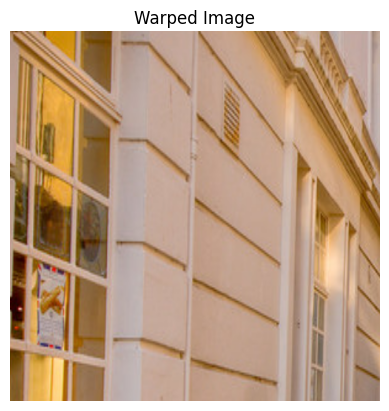

In [51]:
import cv2
import requests
from io import BytesIO

image_url = 'http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/img2warp.jpg'

response = requests.get(image_url)

#Converting image to numpy array
image_data = np.frombuffer(response.content, dtype=np.uint8)
# Using opencv do decode the numpy array
image = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
# Warping the image
warped_image = cv2.warpPerspective(image, H, (width, height))

plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
plt.title("Warped Image")
plt.axis('off')
plt.show()

We decode the image above using opencv imdecode. We apply a homography matrix to the image to warp it to the new perspective.